In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
import numpy as np
from pandas import merge
import re


In [206]:
df = pd.read_pickle('df_num')
drugbank_df = pd.read_pickle('db_df')

In [207]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df)

In [208]:
y_pred is kmeans.labels_


True

In [209]:
kmeans.cluster_centers_

array([[ 3.43308191e+02,  1.84293588e+00, -3.32821616e+00,
         8.58893613e+00,  2.60652662e+00, -3.32821616e+00,
         8.86869215e+01,  4.69668382e+00,  2.23994335e+00,
         5.35837947e+00,  8.96162911e+01,  3.44380557e+01,
         2.50332573e+00,  8.95692995e-01],
       [ 4.69901142e+03, -1.17082143e+01, -3.76537792e+00,
         2.85873680e+00,  8.47157090e+00, -3.76537792e+00,
         1.89963750e+03,  8.67142857e+01,  5.73214286e+01,
         1.27000000e+02,  1.14791536e+03,  4.23714708e+02,
         1.96071429e+01,  2.22044605e-16],
       [ 9.59972371e+02,  1.76976654e+00, -4.30219041e+00,
         6.45194371e+00,  3.91032403e+00, -4.30219041e+00,
         2.93364021e+02,  1.43307393e+01,  8.09987030e+00,
         1.93942931e+01,  2.31891505e+02,  9.29501309e+01,
         4.79247730e+00,  5.31776913e-02]])

Kmeans aplicado diretamente com as 2 primeiras colunas do DF (peso molecular e logP)

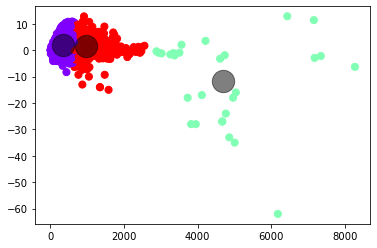

In [210]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=y_pred, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

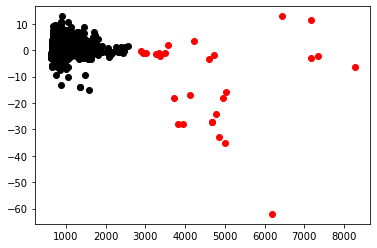

In [212]:
#filter rows of original data
filtered_label2 = df[y_pred == 1]
 
filtered_label8 = df[y_pred == 2]
 
#Plotting the results
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'red')
plt.scatter(filtered_label8.iloc[:,0] , filtered_label8.iloc[:,1] , color = 'black')
plt.show()

aplicaçao metodo elbow e aplicação do kmeans com o dado tratado no standardscaler com base visto em https://realpython.com/k-means-clustering-python/

In [200]:
# from sklearn.cluster import KMeans, DBSCAN
# from sklearn import preprocessing
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA


In [201]:
# min_max_scaler = preprocessing.MinMaxScaler()
# standard_scaler = StandardScaler()

# dfscaled = standard_scaler.fit_transform(df)


# pca = PCA(n_components=2)

# pComp = pca.fit_transform(dfscaled)


In [202]:
# k = 5
# kmeans = KMeans(n_clusters=k)
# y_pred = kmeans.fit_predict(pComp)


In [203]:
# plt.scatter(pComp[:, 0], pComp[:, 1], c=y_pred, s=50, cmap='rainbow')
# centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

In [204]:
# #Importing required modules
 
# from sklearn.datasets import load_digits
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans
# import numpy as np
# from sklearn.cluster import KMeans
 
# #Initialize the class object
# kmeans = KMeans(n_clusters= 4)
 
# #predict the labels of clusters.
# label = kmeans.fit_predict(dfscaled)
 
# #Getting unique labels
# u_labels = np.unique(label)
 
# #plotting the results:
# for i in u_labels:
#     plt.scatter(dfscaled[label == i , 0] , dfscaled[label == i , 1] , label = i)
# plt.legend()
# plt.show()

Aplicação do PCA e clusterização

In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(df)


1 1372268311.2024612
2 721306969.8315132
3 398554863.7561172
4 264744994.06347352
5 190071791.23819178
6 142356295.0522177
7 122383345.01484683
8 116044183.13598236
9 86397454.66162798
10 81372146.28988738


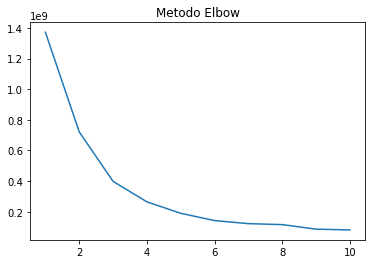

In [185]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'random')
    kmeans.fit(X2D)
    print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Metodo Elbow')

plt.show()

In [186]:
pca.explained_variance_ratio_


array([0.96819908, 0.02671705])

In [191]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred2 = kmeans.fit_predict(X2D)
kmeans.cluster_centers_

array([[-4.54449365e+01,  4.31416740e-01],
       [ 6.22283340e+02, -1.57515322e+01],
       [ 4.80190381e+03,  2.25478667e+02]])

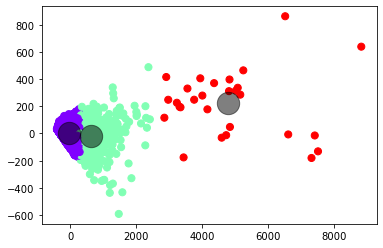

In [192]:
plt.scatter(X2D[:, 0], X2D[:, 1], c=y_pred2, s=50, cmap='rainbow')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

In [193]:
dfcluster = pd.DataFrame(y_pred2)

drugbank_df["cluster"] = dfcluster

df["cluster"] = dfcluster

In [194]:
drugbank_df

,drugbank_id,name,type,groups,categories,molecular_weight,state,water_solubility,melt_point,boil_point,...,physiological_charge,polar_surface_area,hydrogen_acceptor_count,hydrogen_donor_count,rotable_bond_count,refractivity,polarizability,number_of_rings,bioavailability,cluster
0,DB00001,Lepirudin,biotech,[approved],"[Amino Acids, Peptides, and Proteins, Anticoag...",None,liquid,None,65 °C,None,...,None,None,None,None,None,None,None,None,None,0
1,DB00002,Cetuximab,biotech,[approved],"[Amino Acids, Peptides, and Proteins, Antibodi...",None,liquid,None,"61 °C (FAB fragment), 71 °C (whole mAb)",None,...,None,None,None,None,None,None,None,None,None,0
2,DB00003,Dornase alfa,biotech,[approved],"[Amino Acids, Peptides, and Proteins, Cough an...",None,liquid,None,67 °C,None,...,None,None,None,None,None,None,None,None,None,0
3,DB00004,Denileukin diftitox,biotech,"[approved, investigational]","[ADP Ribose Transferases, Amino Acids, Peptide...",None,liquid,None,None,None,...,None,None,None,None,None,None,None,None,None,0
4,DB00005,Etanercept,biotech,"[approved, investigational]","[Agents reducing cytokine levels, Amino Acids,...",None,liquid,None,71 °C (whole mAb),None,...,None,None,None,None,None,None,None,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14310,DB16420,Vibostolimab,biotech,[investigational],[],None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0
14311,DB16421,Volagidemab,biotech,[investigational],"[Amino Acids, Peptides, and Proteins, Antibodi...",None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0
14312,DB16422,Quavonlimab,biotech,[investigational],[],None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0
14313,DB16423,AK119,biotech,[investigational],[],None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,0


In [195]:
drugbank_df[drugbank_df.cluster == 0].type.value_counts()

small molecule    11035
biotech            2481
Name: type, dtype: int64

In [196]:
drugbank_df[drugbank_df.cluster == 1].type.value_counts()

small molecule    771
Name: type, dtype: int64

In [197]:
drugbank_df[drugbank_df.cluster == 2].type.value_counts()

small molecule    28
Name: type, dtype: int64

In [198]:
##drugbank_df[drugbank_df.cluster == 2]

In [199]:
##drugbank_df[drugbank_df["name"].str.contains("cov",flags = re.IGNORECASE)]